In [81]:
import pandas as pd
import os
pd.set_option("display.precision", 20)
pd.set_option('max_colwidth', 800)

df_15 = pd.read_csv('csvData/camera_15_v_baseline_1800.csv').drop("Unnamed: 0",axis=1).drop('rating',axis=1).rename(columns={'p_val':'15'})
df_25 = pd.read_csv('csvData/camera_25_v_baseline_1800.csv').drop("Unnamed: 0",axis=1).drop('rating',axis=1).rename(columns={'p_val':'25'})
df_50 = pd.read_csv('csvData/camera_50_v_baseline_1800.csv').drop("Unnamed: 0",axis=1).drop('rating',axis=1).rename(columns={'p_val':'50'})
df_100 = pd.read_csv('csvData/camera_100_v_baseline_1800.csv').drop("Unnamed: 0",axis=1).drop('rating',axis=1).rename(columns={'p_val':'100'})
df_150 = pd.read_csv('csvData/camera_150_v_baseline_1800.csv').drop("Unnamed: 0",axis=1).drop('rating',axis=1).rename(columns={'p_val':'150'})
df_200 = pd.read_csv('csvData/camera_200_v_baseline_1800.csv').drop("Unnamed: 0",axis=1).drop('rating',axis=1).rename(columns={'p_val':'200'})


df_joined = df_15.join(
                df_25.set_index('metric'), on='metric').join(
                    df_50.set_index('metric'), on='metric').join(
                        df_100.set_index('metric'),on='metric').join(
                            df_150.set_index('metric'),on='metric').join(
                                df_200.set_index('metric'),on='metric')




In [141]:
data= {
    'metric' :           ['15', '25', '50','100','150','200'],
    'Brightness.mean':   df_joined[df_joined['metric'] == 'image.Brightness.mean' ].to_numpy()[0][1:],
    'Brightness.stddev' : df_joined[df_joined['metric'] == 'image.Brightness.stddev' ].to_numpy()[0][1:],
    'Hue.mean' :         df_joined[df_joined['metric'] == 'image.Hue.mean' ].to_numpy()[0][1:],
    'Hue.stddev' :       df_joined[df_joined['metric'] == 'image.Hue.stddev' ].to_numpy()[0][1:],
    'ImagePixelHeight':  df_joined[df_joined['metric'] == 'image.ImagePixelHeight' ].to_numpy()[0][1:],
    'ImagePixelWidth':   df_joined[df_joined['metric'] == 'image.ImagePixelWidth' ].to_numpy()[0][1:],
    'Saturation.mean':   df_joined[df_joined['metric'] == 'image.Saturation.mean' ].to_numpy()[0][1:],
    'Saturation.stddev': df_joined[df_joined['metric'] == 'image.Saturation.stddev' ].to_numpy()[0][1:],
    'Drift Threshold' :  [0.05,0.05,0.05,0.05,0.05,0.05],
}
converted_df = pd.DataFrame(data)
converted_df

,metric,Brightness.mean,Brightness.stddev,Hue.mean,Hue.stddev,ImagePixelHeight,ImagePixelWidth,Saturation.mean,Saturation.stddev,Drift Threshold
0,15,0.04247148106401919809,0.0004562693736735,0.0022242011279639002,0.14291786137788278777,0.00000000000000008654,0.0,0.10569256924463199532,0.00482856409749230029,0.05000000000000000278
1,25,0.45999995267275128885,0.00000006954197995287,0.00098124312543329995,0.29888047640736531418,0.0,0.0,0.00681177646631390011,0.00000174246338271661,0.05000000000000000278
2,50,0.07797329677288500349,0.00000172785670183699,0.00000877957371418663,0.03810201579348519718,0.0,0.0,0.00144639268257839996,0.00001593331374503356,0.05000000000000000278
3,100,0.00040938238526790001,0.00000000136446794537,0.00000001511525445211,0.00017764047889810001,0.0,0.0,0.00000005415932043736,0.00000000000000024189,0.05000000000000000278
4,150,0.00000001202475131733,0.00000000000005529279,0.00000000022518200529,0.00000866291842830513,0.0,0.0,0.00000000000230630104,0.00000000000000000002,0.05000000000000000278
5,200,0.00000000003955615516,0.00000000000000000006,0.00000000000000108077,0.00000044914922129788,0.0,0.0,0.00000000000031563798,0.0,0.05000000000000000278


<AxesSubplot:title={'center':'camera vs baseline 1800'}, xlabel='Batch size'>

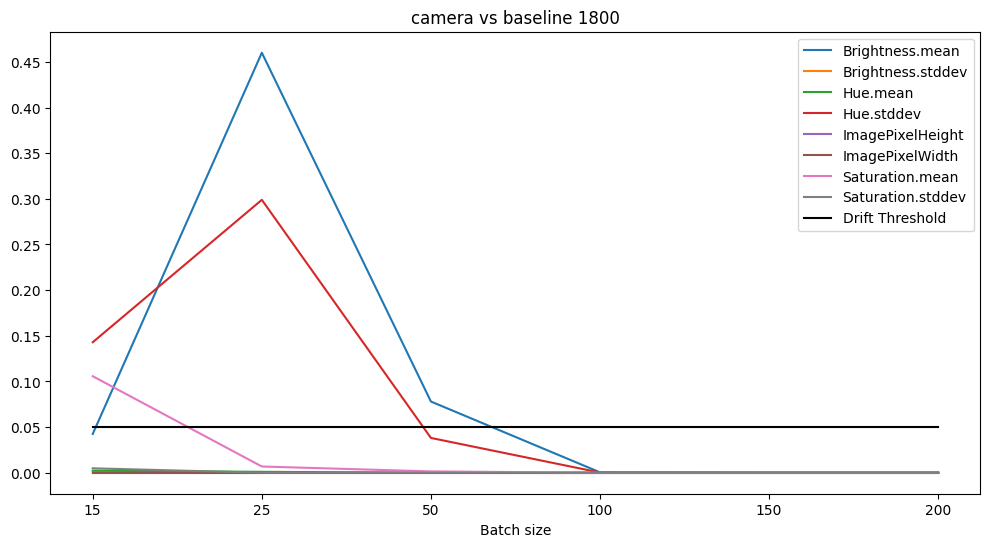

In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
my_yticks = np.arange(0,0.5,0.05)

ax =converted_df.plot.line(
    y=['Brightness.mean', 'Brightness.stddev', 'Hue.mean','Hue.stddev','ImagePixelHeight','ImagePixelWidth','Saturation.mean','Saturation.stddev'],
    x='metric',
    figsize=(12,6), 
    title='camera vs baseline 1800',
    xlabel='Batch size',
    yticks=my_yticks,
     )
converted_df.plot(kind='line',y='Drift Threshold',color='black',ax=ax)

In [83]:
df_joined_t = df_joined.T

df_joined_t



,0,1,2,3,4,5,6,7
metric,image.Brightness.mean,image.Brightness.stddev,image.Hue.mean,image.Hue.stddev,image.ImagePixelHeight,image.ImagePixelWidth,image.Saturation.mean,image.Saturation.stddev
15,0.04247148106401919809,0.0004562693736735,0.0022242011279639002,0.14291786137788278777,0.00000000000000008654,0.0,0.10569256924463199532,0.00482856409749230029
25,0.45999995267275128885,0.00000006954197995287,0.00098124312543329995,0.29888047640736531418,0.0,0.0,0.00681177646631390011,0.00000174246338271661
50,0.07797329677288500349,0.00000172785670183699,0.00000877957371418663,0.03810201579348519718,0.0,0.0,0.00144639268257839996,0.00001593331374503356
100,0.00040938238526790001,0.00000000136446794537,0.00000001511525445211,0.00017764047889810001,0.0,0.0,0.00000005415932043736,0.00000000000000024189
150,0.00000001202475131733,0.00000000000005529279,0.00000000022518200529,0.00000866291842830513,0.0,0.0,0.00000000000230630104,0.00000000000000000002
200,0.00000000003955615516,0.00000000000000000006,0.00000000000000108077,0.00000044914922129788,0.0,0.0,0.00000000000031563798,0.0


In [92]:
index_ = [0,1,2,3,4,5,6,7]
df_joined_t.index = index_
df_joined_t

ValueError: Length mismatch: Expected axis has 7 elements, new values have 8 elements

In [79]:
my_df = pd.DataFrame({
    'metric' :           ['15', '25', '50','100','150','200'],
    'Brightness.mean' :  [0.0424714810640192,0.4599999526727513,0.077973296772885,0.0004093823852679,1.2024751317325144e-08,3.9556155157431154e-11],
    'Brightness.stddev' :[0.0004562693736735,6.954197995286507e-08,1.7278567018369911e-06,1.3644679453725607e-09,5.5292791814364525e-14,5.855643755545997e-20],
    'Hue.mean' :         [0.0022242011279639,0.0009812431254333,8.779573714186633e-06,1.5115254452109224e-08,2.2518200528759672e-10,1.0807674395197609e-15],
    'Hue.stddev' :       [0.1429178613778828,0.2988804764073653,0.0381020157934852,0.0001776404788981,8.662918428305133e-06,4.491492212978754e-07],
    'ImagePixelHeight':  [8.654366007030413e-17,1.0667162844231275e-27,7.017559276169826e-54,4.6200948848583815e-104,5.7010016100852594e-151,8.673403626778623e-197],
    'ImagePixelWidth':   [4.9041187720891924e-24,8.917606454733509e-40,1.4910694665282167e-77,5.862185562338315e-150,1.215388294308157e-217,9.449347156234196e-284],
    'Saturation.mean':   [0.105692569244632,0.0068117764663139,0.0014463926825784,5.4159320437358386e-08,2.3063010425278253e-12,3.156379826144608e-13],
    'Saturation.stddev': [0.0048285640974923,1.7424633827166117e-06,1.593331374503356e-05,2.4189227282614686e-16,1.9383489804987364e-20,5.877976894677195e-27],
    'Drift Threshold' :  [0.05,0.05,0.05,0.05,0.05,0.05]
})

my_df

,metric,Brightness.mean,Brightness.stddev,Hue.mean,Hue.stddev,ImagePixelHeight,ImagePixelWidth,Saturation.mean,Saturation.stddev,Drift Threshold
0,15,0.04247148106401919809,0.00045626937367350000,0.00222420112796390020,0.14291786137788278777,8.65436600703041258047e-17,4.90411877208919237205e-24,0.10569256924463199532,4.82856409749230029022e-03,0.05000000000000000278
1,25,0.45999995267275128885,0.00000006954197995287,0.00098124312543329995,0.29888047640736531418,1.06671628442312753849e-27,8.91760645473350867150e-40,0.00681177646631390011,1.74246338271661167088e-06,0.05000000000000000278
2,50,0.07797329677288500349,0.00000172785670183699,0.00000877957371418663,0.03810201579348519718,7.01755927616982575211e-54,1.49106946652821671884e-77,0.00144639268257839996,1.59333137450335592068e-05,0.05000000000000000278
3,100,0.00040938238526790001,0.00000000136446794537,0.00000001511525445211,0.00017764047889810001,4.62009488485838149761e-104,5.86218556233831506798e-150,0.00000005415932043736,2.41892272826146856907e-16,0.05000000000000000278
4,150,0.00000001202475131733,0.00000000000005529279,0.00000000022518200529,0.00000866291842830513,5.70100161008525935130e-151,1.21538829430815700937e-217,0.00000000000230630104,1.93834898049873642481e-20,0.05000000000000000278
5,200,0.00000000003955615516,0.00000000000000000006,0.00000000000000108077,0.00000044914922129788,8.67340362677862331593e-197,9.44934715623419590553e-284,0.00000000000031563798,5.87797689467719505730e-27,0.05000000000000000278


<AxesSubplot:title={'center':'camera vs baseline 1800'}, xlabel='Batch size'>

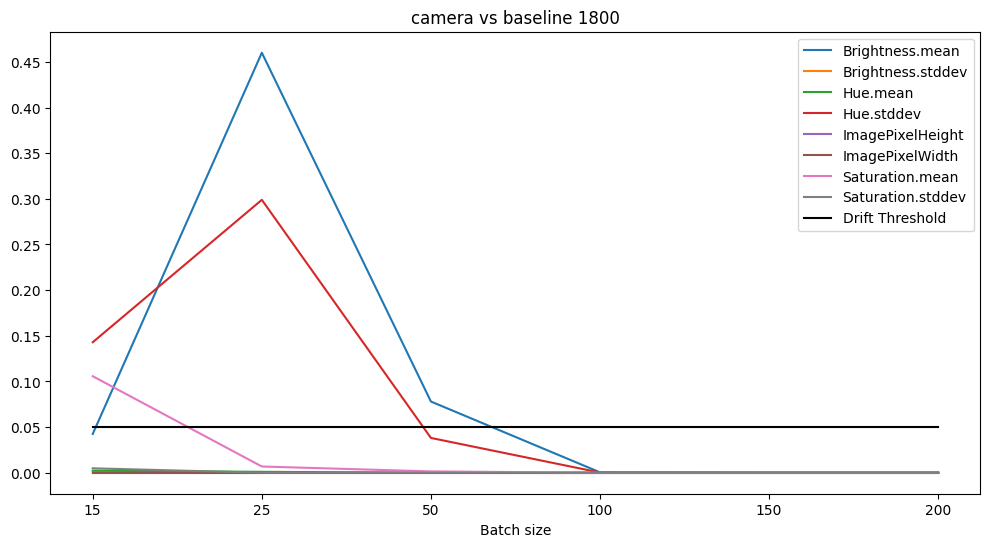

In [70]:
my_df = pd.DataFrame({
    'metric' :           ['15', '25', '50','100','150','200'],
    'Brightness.mean' :  [0.0424714810640192,0.4599999526727513,0.077973296772885,0.0004093823852679,1.2024751317325144e-08,3.9556155157431154e-11],
    'Brightness.stddev' :[0.0004562693736735,6.954197995286507e-08,1.7278567018369911e-06,1.3644679453725607e-09,5.5292791814364525e-14,5.855643755545997e-20],
    'Hue.mean' :         [0.0022242011279639,0.0009812431254333,8.779573714186633e-06,1.5115254452109224e-08,2.2518200528759672e-10,1.0807674395197609e-15],
    'Hue.stddev' :       [0.1429178613778828,0.2988804764073653,0.0381020157934852,0.0001776404788981,8.662918428305133e-06,4.491492212978754e-07],
    'ImagePixelHeight':  [8.654366007030413e-17,1.0667162844231275e-27,7.017559276169826e-54,4.6200948848583815e-104,5.7010016100852594e-151,8.673403626778623e-197],
    'ImagePixelWidth':   [4.9041187720891924e-24,8.917606454733509e-40,1.4910694665282167e-77,5.862185562338315e-150,1.215388294308157e-217,9.449347156234196e-284],
    'Saturation.mean':   [0.105692569244632,0.0068117764663139,0.0014463926825784,5.4159320437358386e-08,2.3063010425278253e-12,3.156379826144608e-13],
    'Saturation.stddev': [0.0048285640974923,1.7424633827166117e-06,1.593331374503356e-05,2.4189227282614686e-16,1.9383489804987364e-20,5.877976894677195e-27],
    'Drift Threshold' :  [0.05,0.05,0.05,0.05,0.05,0.05]
})

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#  gca = get current axis
# ax = plt.gca()

# axs = plt.gca()
# fig, axs = plt.subplots(figsize=[12,6])
my_yticks = np.arange(0,0.5,0.05)
# axs.set_yticks(my_yticks)
# # axs.set_xlabel('Batchsize')
# #
# # plt.set_label('camera vs. baseline 1800')
# my_df.plot(kind='line',x='metric',y='Brightness.mean'  ,ax=axs,figsize=[12,6], title='camera vs baseline 1800', xlabel='Batchsize')
# my_df.plot(kind='line',x='metric',y='Brightness.stddev',ax=axs,figsize=[12,6])
# my_df.plot(kind='line',x='metric',y='Hue.mean'         ,ax=axs,figsize=[12,6])
# my_df.plot(kind='line',x='metric',y='Hue.stddev'       ,ax=axs,figsize=[12,6])
# my_df.plot(kind='line',x='metric',y='ImagePixelHeight' ,ax=axs,figsize=[12,6])
# my_df.plot(kind='line',x='metric',y='ImagePixelWidth'  ,ax=axs,figsize=[12,6])
# my_df.plot(kind='line',x='metric',y='Saturation.mean'  ,ax=axs,figsize=[12,6])
# my_df.plot(kind='line',x='metric',y='Saturation.stddev',ax=axs,figsize=[12,6])
# my_df.plot(kind='line',x='metric',y='Drift Threshold'  ,ax=axs, color='black',figsize=[12,6])



ax =my_df.plot.line(
    y=['Brightness.mean', 'Brightness.stddev', 'Hue.mean','Hue.stddev','ImagePixelHeight','ImagePixelWidth','Saturation.mean','Saturation.stddev'],
    x='metric',
    figsize=(12,6), 
    title='camera vs baseline 1800',
    xlabel='Batch size',
    yticks=my_yticks,
    # xticks=[15,25,50,100,150,200]
     )
my_df.plot(kind='line',y='Drift Threshold',color='black',ax=ax)
